## Power System Data Analysis
The provided load data represents the 15-minute daily electricity demand (Load Curve) of one institution, consisting of one residential photovoltaic,        one residential,    one commercial, and one electric vehicle charging station.
In this section, we will divide it into 3 parts.
1. Load Characteristic
    - Plot the electricity demand data for residential, commerial, and electric vehicle charging stations over a single day onto the same graph.
    - Plot total load curve
    - Plot load duration curve 
2. Solar PV and Net Load Analysis
    - Plot PV Generation
    - Calculate and Plot Residential Net Load
3. Energy management using battery energy storage systems
    - Design the usage (electrical power required for charging and discharging) of the battery energy storage system.
    - Plot the power graph of the battery energy storage system over a single day.
    - Plot Stage of Charge over a 1-day period
    - Find the net electricity demand (Net Load) of the residential and plot the net electricity demand of the residential (including battery power), over a 1-day period.





# Load Characteristic

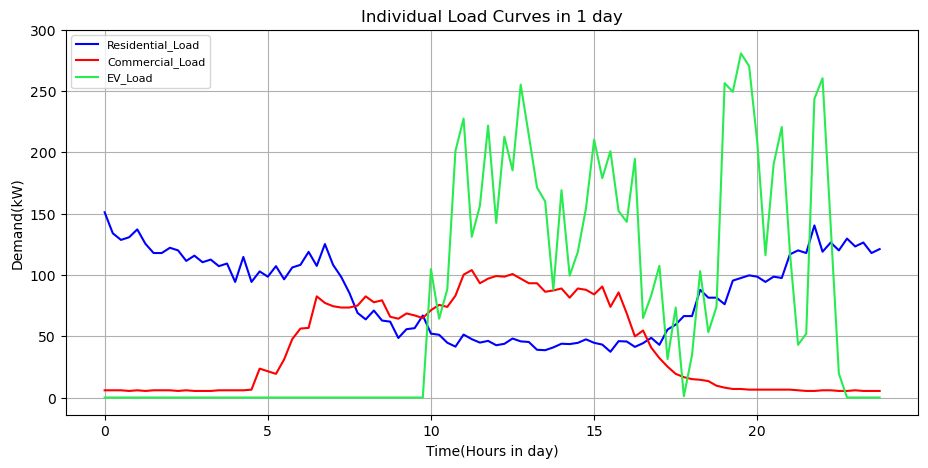

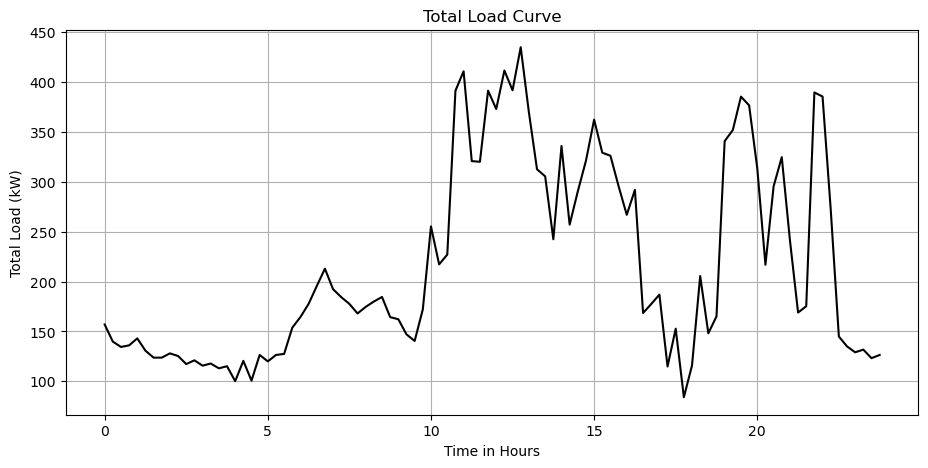

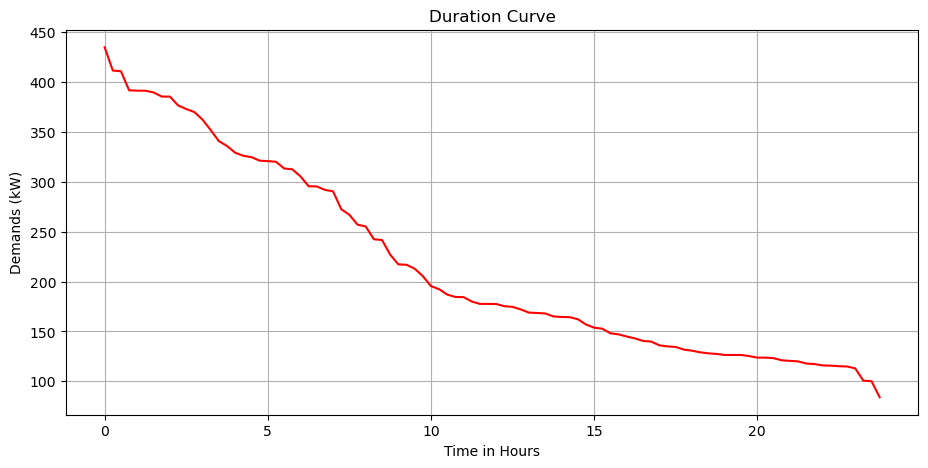

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
colums_name = ['Times','Residential_PV','Residential_Load','Commercial_Load','EV_Load',]
df = pd.read_csv('Power_System_Data-198329-17614987251090.csv',header=None,skiprows=1,names = colums_name,)
Time = np.linspace(0,23.75,96)

# Plot Individual Load Curves
plt.figure(figsize=(11,5))
plt.plot(Time,                    
         df['Residential_Load'],
         label = 'Residential_Load',    
         color='blue') 
plt.plot(Time,                     
         df['Commercial_Load'],
         label = 'Commercial_Load',     
         color='red'              
         )
plt.plot(Time,
         df['EV_Load'],
         label='EV_Load',
         color='#28eb4f')
plt.title('Individual Load Curves in 1 day')
plt.xlabel('Time(Hours in day)')
plt.ylabel('Demand(kW)')
plt.xticks(np.arange(0, 25, 5))
plt.yticks(np.arange(0,350,50))
plt.grid(True)
plt.legend(loc='upper left', fontsize=8)

# Plot Total Load Curve and Load Duration
load_columns = ['Residential_PV','Residential_Load','Commercial_Load','EV_Load']
df[load_columns] = df[load_columns].apply(pd.to_numeric)
df['total_load'] = df[load_columns].sum(axis=1)
plt.figure(figsize=(11,5))
plt.plot(Time,
         df['total_load'],
         color = 'black')
plt.title('Total Load Curve')
plt.xlabel('Time in Hours')
plt.ylabel('Total Load (kW)')
plt.grid(True)

sorted_load = df['total_load'].sort_values(ascending = False).reset_index(drop = True)
plt.figure(figsize=(11,5))
plt.plot(Time,
        sorted_load,
        color = 'red')
plt.title('Duration Curve')
plt.xlabel('Time in Hours')
plt.ylabel('Demands (kW)')
plt.grid(True)

## Net load that includes the solar photovoltaic

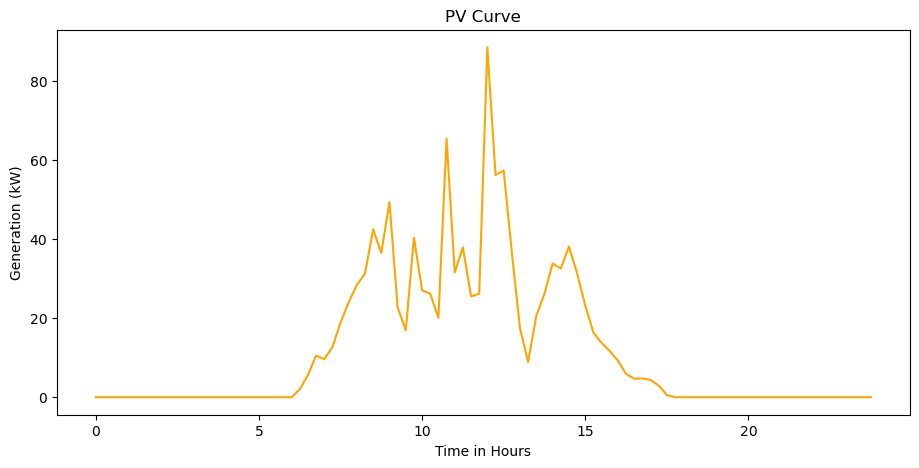

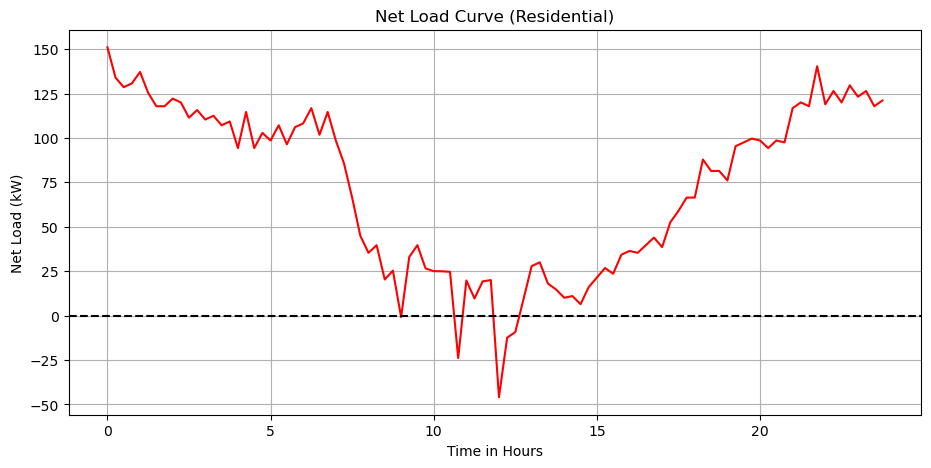

In [219]:
# Plot Residential Photovoltaic (Residential PV) and Plot Net Load of Residential
plt.figure(figsize=(11,5))
plt.plot(Time,
         df['Residential_PV'],
         color = 'orange',
         )
plt.title('PV Curve')
plt.xlabel('Time in Hours')
plt.ylabel('Generation (kW)')

Net_load = df['Residential_Load'] - df['Residential_PV'].tolist()

plt.figure(figsize=(11,5))
plt.plot(Time,
         Net_load,
         color = 'red',
         )
plt.title('Net Load Curve (Residential)')
plt.xlabel('Time in Hours')
plt.ylabel('Net Load (kW)')
plt.grid(True)
plt.axhline(0,color = 'black',linestyle = '--')

# Energy management using battery energy storage systems
The battery energy storage system in Residential has a capacity of 100 kW and 200 kWh. The battery energy storage system is required to reach a 50% charge state at startup. This is to ignore the power losses during charging and discharging.
 - Design the usage (electrical power used for charging and discharging) of the battery energy storage system.
 - Plot the state of charge (Stage of Charge) of the battery energy storage system.
 - Based on net load that includes the solar photovoltaic in part 2 , find the net electricity demand for residential and plot the net electricity demand graph for residential over a 1-day period.

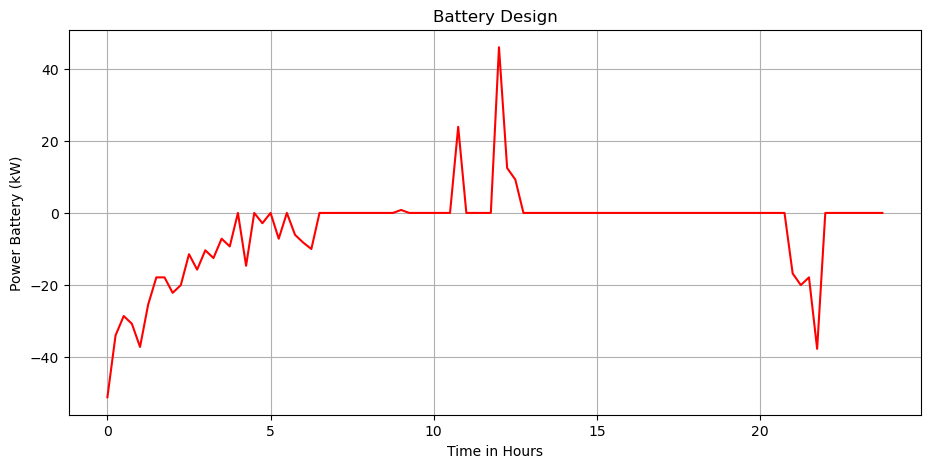

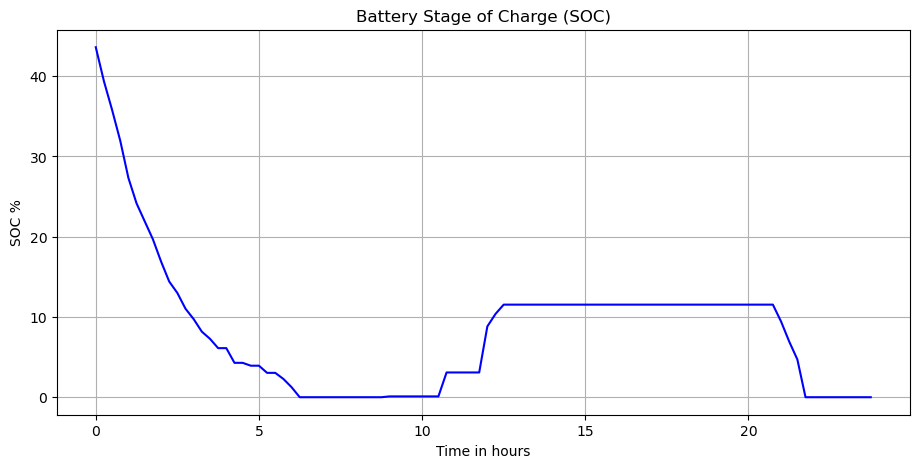

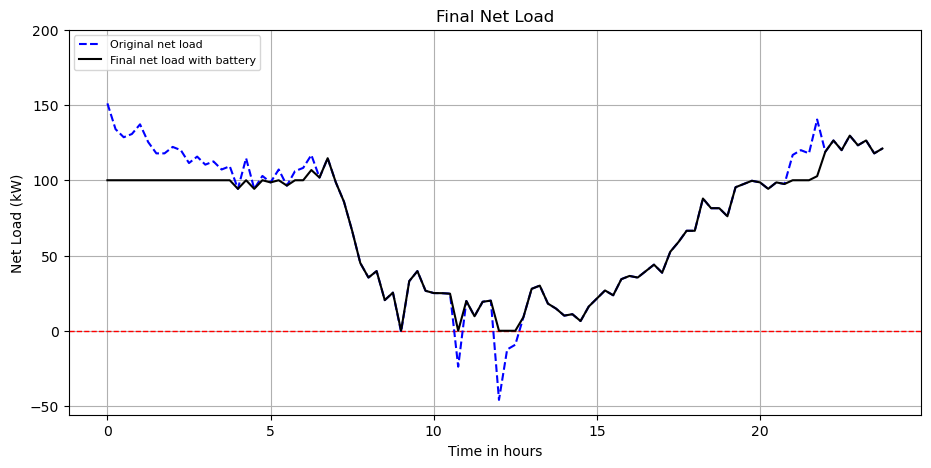

In [220]:
# Energy management using battery energy storage systems
rate_power = 100 #kW
rate_energy = 200 #kWh
initial_soc = [] # %
initial_energy = 100 # Stage of Charge
current_energy = 100 # kWh
timeInterval_hours = 1/4 # Space of time
current_batt = []
# Degign battery
peakShavingThreshold_kW = 100 #  <--- Can change this number and see the change result
for i in range(0,96) : 
    current_netload = Net_load[i]
    powerdecision = 0
    if current_netload < 0 : # Charge
        # Check power limit
        current_netload = -current_netload
        powerdecision = min(current_netload,rate_power)
        # Check energy limit
        maxcharge_allowed = (rate_energy - current_energy) / timeInterval_hours
        powerdecision = min(maxcharge_allowed,powerdecision)
    elif current_netload > peakShavingThreshold_kW : # Discharge
        # Check power limit
        powerdecision = current_netload - peakShavingThreshold_kW
        powerdecision = min(powerdecision,rate_power)
        # Check energy limit
        maxdischarge_allowed = current_energy / timeInterval_hours
        powerdecision = min(powerdecision,maxdischarge_allowed)
        powerdecision = -powerdecision
    current_batt.append(powerdecision)
    energycharge = powerdecision*timeInterval_hours
    current_energy = current_energy + energycharge
    initial_soc.append((current_energy/rate_energy)* 100)

plt.figure(figsize = (11,5))
plt.plot(Time,
         current_batt,
         color = 'red')
plt.title('Battery Design')
plt.xlabel('Time in Hours')
plt.ylabel('Power Battery (kW)')
plt.grid(True)

plt.figure(figsize=(11,5))
plt.plot(Time,
         initial_soc,
         color = 'blue') 
plt.title('Battery Stage of Charge (SOC)')
plt.xlabel('Time in hours')
plt.ylabel('SOC %')
plt.grid(True)


Final_load = Net_load + current_batt

plt.figure(figsize=(11,5))
plt.axhline(0,color= 'red',linestyle = '--',linewidth = 1)
plt.plot(Time,
         Net_load,
         label = 'Original net load',
         color = 'blue',
         linestyle= '--')
plt.plot(Time,
        Final_load,
        label = 'Final net load with battery',
        color = 'black')
plt.title('Final Net Load')
plt.xlabel('Time in hours')
plt.ylabel('Net Load (kW)')
plt.legend(loc = 'upper left',fontsize = 8)
plt.yticks(np.arange(-50,250,50))
plt.grid(True)


